Output Gap Analysis (Provided by Other Sources) and Map Graphs

## Output Gap

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [2]:
# Function to filter out every country that is not China (40)
def getChina(dataframe):
    new_df = dataframe.iloc[40]
    return new_df

In [3]:
# Read in Output Gap Files for US, Canada, and France
# US data is quarterly and Canada/France is yearly. US can be coverted to yearly.
US_output_gap = pd.read_csv("US_quarterly_output_gap.csv")
Canada_output_gap = pd.read_csv("Canada_yearly_output_gap.csv")
France_output_gap = pd.read_csv("France_yearly_output_gap.csv")

# China requires preprocessing to get the projected GDP
# The projected GDP change (%) was available, so this is used to find the projected GDP
# The projected GDP change was only available from 2013 to 2021
China_GDP_Projected_Percent_Change = pd.read_csv("China GDP Projected Growth Percentage.csv")

# Get actual Chinese GDP for relevant years
China_actual_GDP = pd.read_csv("GDP (current US$).csv")
China_actual_GDP = getChina(China_actual_GDP)

# Get GDP from 2013 to 2021, lining the years up with the years for which projected GDP change is given
China_actual_GDP = China_actual_GDP.iloc[-9:-1]
China_actual_GDP['2021'] = 15600000000000.0
print(China_actual_GDP)
# Merge the Actual GDP into the projected GDP and set the index to the year                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      nto the Projected Percent Change Dataframe
China_GDP_Projected_Percent_Change.set_index('Year', inplace= True)
China_GDP_Projected_Percent_Change['China Actual GDP'] = list(China_actual_GDP)
China_GDP_Projected_Percent_Change

2013     9570000000000.0
2014    10500000000000.0
2015    11100000000000.0
2016    11200000000000.0
2017    12300000000000.0
2018    13900000000000.0
2019    14300000000000.0
2020    14700000000000.0
2021    15600000000000.0
Name: 40, dtype: object


,Projectd GDP Growth Percentage,China Actual GDP
Year,,
2013,8.231,9.570000e+12
2014,7.745,1.050000e+13
2015,7.248,1.110000e+13
2016,6.750,1.120000e+13
2017,6.242,1.230000e+13
2018,5.827,1.390000e+13
2019,5.620,1.430000e+13
2020,5.310,1.470000e+13
2021,5.124,1.560000e+13


In [4]:
# Find Projected GDP Values
 
first_projection = China_actual_GDP[0]
projections = [first_projection]
for year in range(1,9):
    #print(China_GDP_Projected_Percent_Change['Projectd GDP Growth Percentage'].iloc[1])
    first_projection = first_projection * (1 + (China_GDP_Projected_Percent_Change['Projectd GDP Growth Percentage'].iloc[year])/100)
    projections.append(first_projection)
print(projections)
China_GDP_Projected_Percent_Change['China Projected GDP'] = projections

# Drop the Projected GDP Growth for China; it is not necessary anymore. Rename the dataframe to Output Gap
Output_Gap = China_GDP_Projected_Percent_Change.drop('Projectd GDP Growth Percentage', axis= 1)
Output_Gap

[9570000000000.0, 10311196500000.0, 11058552022320.002, 11805004283826.602, 12541872651223.057, 13272687570609.824, 14018612612078.098, 14763000941779.443, 15519457110036.22]


,China Actual GDP,China Projected GDP
Year,,
2013,9.570000e+12,9.570000e+12
2014,1.050000e+13,1.031120e+13
2015,1.110000e+13,1.105855e+13
2016,1.120000e+13,1.180500e+13
2017,1.230000e+13,1.254187e+13
2018,1.390000e+13,1.327269e+13
2019,1.430000e+13,1.401861e+13
2020,1.470000e+13,1.476300e+13
2021,1.560000e+13,1.551946e+13


In [5]:
# Find the Output Gap by finding the percent difference between the potential and actual GDP for each year

Output_Gap['China Output Gap'] = 100 * ((Output_Gap['China Actual GDP'] - Output_Gap['China Projected GDP']) / Output_Gap['China Projected GDP'])
Output_Gap

,China Actual GDP,China Projected GDP,China Output Gap
Year,,,
2013,9.570000e+12,9.570000e+12,0.000000
2014,1.050000e+13,1.031120e+13,1.831053
2015,1.110000e+13,1.105855e+13,0.374805
2016,1.120000e+13,1.180500e+13,-5.124981
2017,1.230000e+13,1.254187e+13,-1.928521
2018,1.390000e+13,1.327269e+13,4.726341
2019,1.430000e+13,1.401861e+13,2.007241
2020,1.470000e+13,1.476300e+13,-0.426749
2021,1.560000e+13,1.551946e+13,0.518980


In [6]:
# Get the Final Quarter Output Gap Measurements for the US and prepare the indices to be combined into the Output Gap dataframe
US_output_gap = US_output_gap.iloc[167:292:4]
new_indices = [year for year in range(1990,2022)]
US_output_gap.index = new_indices
US_output_gap

,DATE,GDPC1_GDPPOT
1990,1990-10-01,-2.4401623335169715
1991,1991-10-01,-3.7446889183886663
1992,1992-10-01,-2.0427175524883458
1993,1993-10-01,-2.1148800111028025
1994,1994-10-01,-0.77951503872791316151
1995,1995-10-01,-1.29222419891487926257
1996,1996-10-01,0.01216027571348605548
1997,1997-10-01,0.72806069207938785812
1998,1998-10-01,1.45909103222840990618
1999,1999-10-01,2.0146406851298987


In [7]:
# Prepare Canada Dataframe to be merged into the Output Gap Dataframe
# Reverse Canada Dataframe order so that it goes from past to present
Canada_output_gap = Canada_output_gap.iloc[::-1]
# Drop all rows not in the 1990-2021 years
Canada_output_gap = Canada_output_gap[10:-3]
print(Canada_output_gap)
# Use same indices that were used for the US Output Gap index change
Canada_output_gap.index = new_indices
Canada_output_gap

          Date  Value
34  1990-12-31  1.258
33  1991-12-31 -1.507
32  1992-12-31 -2.401
31  1993-12-31 -2.074
30  1994-12-31 -0.421
29  1995-12-31 -0.806
28  1996-12-31 -2.325
27  1997-12-31 -1.497
26  1998-12-31 -1.251
25  1999-12-31  0.154
24  2000-12-31  1.524
23  2001-12-31 -0.306
22  2002-12-31 -0.350
21  2003-12-31 -0.902
20  2004-12-31 -0.097
19  2005-12-31  0.853
18  2006-12-31  1.298
17  2007-12-31  1.525
16  2008-12-31  0.748
15  2009-12-31 -3.550
14  2010-12-31 -1.748
13  2011-12-31 -0.473
12  2012-12-31 -1.178
11  2013-12-31 -1.298
10  2014-12-31 -0.823
9   2015-12-31 -2.052
8   2016-12-31 -2.399
7   2017-12-31 -0.799
6   2018-12-31 -0.525
5   2019-12-31 -0.370
4   2020-12-31  0.087
3   2021-12-31  0.276


,Date,Value
1990,1990-12-31,1.258
1991,1991-12-31,-1.507
1992,1992-12-31,-2.401
1993,1993-12-31,-2.074
1994,1994-12-31,-0.421
1995,1995-12-31,-0.806
1996,1996-12-31,-2.325
1997,1997-12-31,-1.497
1998,1998-12-31,-1.251
1999,1999-12-31,0.154


In [8]:
# Prepare France Dataframe to be merged into the Output Gap Dataframe
France_output_gap = France_output_gap.iloc[::-1]
# Drop all rows not in the 1990-2021 years
France_output_gap = France_output_gap[10:-3]
# Use same indices that were used for the US Output Gap index change
France_output_gap.index = new_indices
France_output_gap
# Change France's Output Gap name so that there aren't column name issues when merging
France_output_gap.rename(columns={'Value': 'France Output Gap'}, inplace=True)

In [9]:
# Combine US Output GAP into Output Gap dataframe
Output_Gap= pd.concat([Output_Gap, US_output_gap, Canada_output_gap, France_output_gap], axis=1)
Output_Gap = Output_Gap.iloc[:,[2,4,6,-1]]
Output_Gap.rename(columns={'GDPC1_GDPPOT': 'US Output Gap','Value': 'Canada Output Gap'}, inplace=True)
#Output_Gap = Output_Gap[Output_Gap['Canada Output Gap','China Output Gap','France Output Gap','US Output Gap',]]
#Output_Gap
#Canada Output Gap.2,US Output Gap,
#Output_Gap.iloc[:,[2,4,6,-1]]

In [10]:
# Covnert Columns to float64 so that they are graphable
Output_Gap = Output_Gap.astype('float64')
Output_Gap

,China Output Gap,US Output Gap,Canada Output Gap,France Output Gap
1990,NaN,-2.440162,1.258,1.849
1991,NaN,-3.744689,-1.507,0.823
1992,NaN,-2.042718,-2.401,0.471
1993,NaN,-2.114880,-2.074,-1.863
1994,NaN,-0.779515,-0.421,-1.462
1995,NaN,-1.292224,-0.806,-1.356
1996,NaN,0.012160,-2.325,-2.015
1997,NaN,0.728061,-1.497,-1.962
1998,NaN,1.459091,-1.251,-0.881
1999,NaN,2.014641,0.154,0.023


/shared-libs/python3.9/py/lib/python3.9/site-packages/seaborn/algorithms.py:98: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
/shared-libs/python3.9/py/lib/python3.9/site-packages/seaborn/algorithms.py:98: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
/shared-libs/python3.9/py/lib/python3.9/site-packages/seaborn/algorithms.py:98: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
/shared-libs/python3.9/py/lib/python3.9/site-packages/seaborn/algorithms.py:98: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
/shared-libs/python3.9/py/lib/python3.9/site-packages/seaborn/algorithms.py:98: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
/shared-libs/python3.9/py/lib/python3.9/site-packages/seaborn/algorithms.py:98: RankWarning: Polyfit may be poorly conditioned
  boot_d

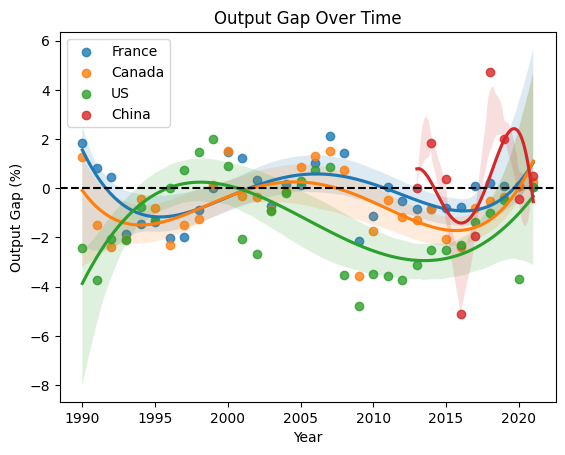

In [15]:
# Plots of all data
sns.regplot(x=Output_Gap.index, y=Output_Gap['France Output Gap'], order = 4, marker='o', label='France', color='tab:blue')
sns.regplot(x=Output_Gap.index, y=Output_Gap['Canada Output Gap'], order = 4, marker='o', label='Canada', color='tab:orange')
sns.regplot(x=Output_Gap.index, y=Output_Gap['US Output Gap'], order = 4, marker='o', label='US', color='tab:green')
sns.regplot(x=Output_Gap.index[-9:], y=Output_Gap['China Output Gap'].dropna(), order = 4, marker='o', ci = 30, label='China', color='tab:red')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Output Gap (%)')
plt.title('Output Gap Over Time')

# Add legend
plt.legend()

# Add a lien at y=0 to show ideal Output Gap
plt.axhline(y=0, color='black', linestyle='--')

# Show the plot
plt.show()

Use US to sell and China to manufacture

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=1ac77d8c-6104-40ce-94f9-fbd01a76a8e9' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>